# Regularized Linear Model 

## Ridge Regression using L2 norm

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

boston = load_boston()
boston_df = pd.DataFrame(boston.data,
                        columns=boston.feature_names)
boston_df['PRICE'] = boston.target

y_target = boston_df['PRICE']
x_feature = boston_df.drop(columns=['PRICE'], inplace=False)

# Regularization 강도값(alpha)으로 10을 부여
ridge = Ridge(alpha=10)
# cross_val_score로 교차검증하면서 모델 검증하기
neg_mse_scores = cross_val_score(ridge, x_feature, y_target,
                                scoring='neg_mean_squared_error',
                                cv=5)
# RMSE score로 변환
rmse_scores = np.sqrt(-1 * neg_mse_scores)
# 교차검증 5번 수행한 mse값들 평균값 내기
avg_rmse = np.mean(rmse_scores)
print(f"교차검증 후 MSE :\n {-1*neg_mse_scores}")
print(f"교차검증 후 RMSE :\n {rmse_scores}")
print(f"교차검증 후 평균 RMSE : {avg_rmse:.4f}")

교차검증 후 MSE :
 [11.4217962  24.29446706 28.14355069 74.59916618 28.51714218]
교차검증 후 RMSE :
 [3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
교차검증 후 평균 RMSE : 5.5182


In [10]:
# Ridge의 alpha값 달리해보면서 RMSE 측정해보기
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, x_feature, y_target,
                                    scoring='neg_mean_squared_error',
                                    cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f"alpha값이 {alpha}일 때, 평균 RMSE: {avg_rmse:.4f}")

alpha값이 0일 때, 평균 RMSE: 5.8287
alpha값이 0.1일 때, 평균 RMSE: 5.7885
alpha값이 1일 때, 평균 RMSE: 5.6526
alpha값이 10일 때, 평균 RMSE: 5.5182
alpha값이 100일 때, 평균 RMSE: 5.3296


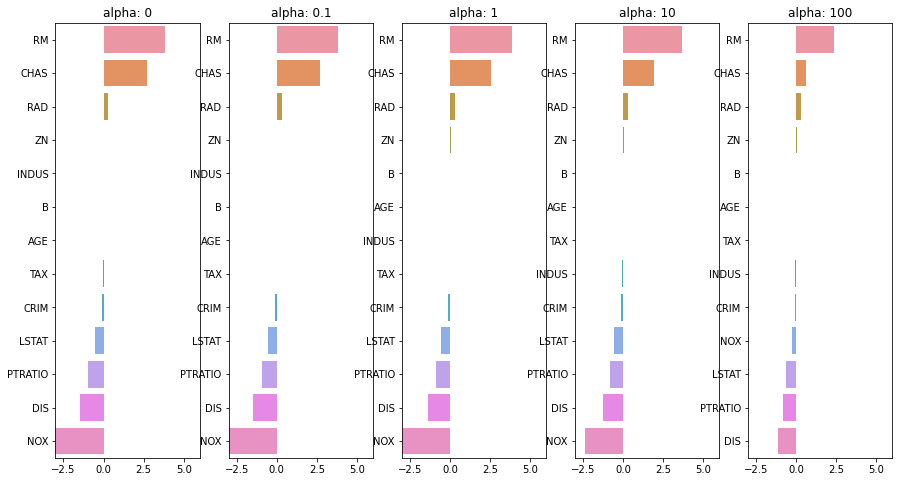

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha값에 따른 회귀계수값 시각화해보기
fig, axs = plt.subplots(figsize=(15,8), nrows=1, ncols=5)
# 각 alpha값에 따른 회귀계수들 저장할 빈 데이터프레임 생성
coeff_df = pd.DataFrame()

# 각 alpha값에 따라 출력되는 회귀계수값들 저장
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_feature, y_target)
    # alpha값에 따른 피처별 회귀계수들을 Series로 바꾸고 이를 데이터프레임에 저장
    coeff = pd.Series(ridge.coef_, index=x_feature.columns)
    colname = 'alpha: '+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 alpha값에 따른 회귀계수들 시각화(계수값이 높은 순으로 정렬)
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    # x축 범위 지정
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [19]:
# alpha값에 따라 출력된 회귀계수값들 저장한 데이터프레임 출력
ridge_alphas = [0, 0.1, 1, 10, 100]
# 하나의 칼럼값들 기준으로 나머지 칼럼값들도 정렬
sort_column = 'alpha: '+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## Lasso Regression using L1 norm

In [43]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params, x_feature, y_target,
                       verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('*'*7, model_name, '*'*7)
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param,
                                                      l1_ratio=0.7)
        neg_mse_score = cross_val_score(model, x_feature,
                                       y_target, cv=5,
                                       scoring='neg_mean_squared_error')
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_score))
        print(f"alpha {param}일 때, 평균 RMSE: {avg_rmse:.4f}")
        # 참고로 cross_val_score는 metric만 반환하기 때문에 회귀계수들을 출력하려면 재학습 시켜야함.
        
        model.fit(x_feature, y_target)
        coeff = pd.Series(data=model.coef_, index=x_feature.columns)
        colname = 'alpha'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [26]:
# Lasso Regression 구현
lasso_alphas = [0.07, 0.3, 1, 10]
coeff_lasso_df = get_linear_reg_eval('Lasso', lasso_alphas,
                                    x_feature, y_target)
sort_column = 'alpha'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

******* Lasso *******
alpha 0.07일 때, 평균 RMSE: 5.612284267526676
alpha 0.3일 때, 평균 RMSE: 5.627606694645083
alpha 1일 때, 평균 RMSE: 5.776020813823375
alpha 10일 때, 평균 RMSE: 6.585731788106536


,alpha0.07,alpha0.3,alpha1,alpha10
RM,3.789725,3.095828,0.949811,0.000000
CHAS,1.434343,0.000000,0.000000,0.000000
RAD,0.270936,0.280509,0.264206,0.000000
ZN,0.049059,0.049744,0.049165,0.026146
B,0.010248,0.009913,0.008247,0.007496
NOX,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.000963,0.020910,0.000000
TAX,-0.014290,-0.015277,-0.015212,-0.009282
INDUS,-0.042120,-0.017829,-0.000000,-0.000000
CRIM,-0.098193,-0.091461,-0.063437,-0.000000


## Elastic Net Regression using L1 norm + L2 norm

In [27]:
elastic_alphas = [0.07, 0.3, 1, 10]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', elastic_alphas,
                                      x_feature, y_target)
sort_column = 'alpha'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

******* ElasticNet *******
alpha 0.07일 때, 평균 RMSE: 5.541654347348139
alpha 0.3일 때, 평균 RMSE: 5.464647571083338
alpha 1일 때, 평균 RMSE: 5.596874445109748
alpha 10일 때, 평균 RMSE: 6.508988051139352


,alpha0.07,alpha0.3,alpha1,alpha10
RM,3.574162,2.543862,0.938789,0.000000
CHAS,1.330724,0.000000,0.000000,0.000000
RAD,0.278880,0.299509,0.289299,0.000000
ZN,0.050107,0.052363,0.052136,0.034126
B,0.010122,0.009584,0.008320,0.007435
AGE,-0.010116,0.000862,0.020348,0.010363
TAX,-0.014522,-0.015783,-0.016218,-0.008981
INDUS,-0.044855,-0.030639,-0.000000,-0.000000
CRIM,-0.099468,-0.095239,-0.073577,-0.000000
NOX,-0.175072,-0.000000,-0.000000,0.000000


# Feature Engineering(회귀 모델편)

- 종속변수(타겟값)은 항상 정규분포 형태를 띄고 있어야 한다!
    * 주로 로그변환 또는 sqrt변환 취함
 
 
- 독립변수들도 정규분포 형태를 띄고 있어야 한다.
    * 여러가지 scaler중 하나 선택
    * scaling 적용 후 PolynominalFeatures를 통해서 다항특성을 적용해 변환. 이 방법은 scaler 적용후 별다른 효과가 없을 때 추가적으로 적용함
    * 로그함수를 적용시킴 -> 이 방법이 가장 유용.. 왜냐하면 scaler는 큰 성능 향상 기대는 못하고 다항특성은 피처개수가 너무 많아져서 과적합 발생 빈번하기 때문
    
    
- 왜냐하면 회귀모델이 가정하고 있는 사항이 독립변수와 종속변수간의 선형관계가 있음을 가정하고 모델링 되기 때문이다.


- **회귀문제에 있어서 범주형 변수들은 보통 원-핫 인코딩을 적용**한다. 레이블 인코딩을 수행하면 그 변환된 숫자값들 사이에서도 높고 낮음의 수준이 존재하기 때문.


(array([ 11.,  23.,  42.,  50.,  84., 102.,  73.,  27.,  25.,  21.,  15.,
          2.,   7.,   5.,  19.]),
 array([ 5.,  8., 11., 14., 17., 20., 23., 26., 29., 32., 35., 38., 41.,
        44., 47., 50.]),
 <BarContainer object of 15 artists>)

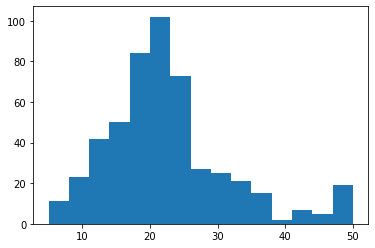

In [31]:
# target 변수 분포 확인 => 정규분포 형태를 띄고 있음..!
plt.hist(y_target, bins=15)

In [51]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval2(model_name, params, x_feature, y_target,
                       verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('*'*7, model_name, '*'*7)
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param,
                                                      l1_ratio=0.7)
        neg_mse_score = cross_val_score(model, x_feature,
                                       y_target, cv=5,
                                       scoring='neg_mean_squared_error')
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_score))
        print(f"alpha {param}일 때, 평균 RMSE: {avg_rmse:.4f}")
        # 참고로 cross_val_score는 metric만 반환하기 때문에 회귀계수들을 출력하려면 재학습 시켜야함.
        
        model.fit(x_feature, y_target)
        coeff_df[colname] = coeff
    return coeff_df

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method, p_degree, input_data):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    # 다항특성 적용해주려면 적용해주기(다항특성은 scaling 후 적용함!!!)
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                        include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [54]:
# Elastic의 alpha값들 다르게 적용하고 alpha값에 따라 RMSE 추출
alphas = [0.07, 0.3, 1, 10]
scaled_methods = [(None, None), ('Standard', None),
                 ('Standard', 2), ('MinMax', None),
                 ('MinMax', 2), ('Log', None)]
for scaled_method in scaled_methods:
    x_data_scaled = get_scaled_data(scaled_method[0],
                                   scaled_method[1],
                                   x_feature)
    print(f"Scaler 종류:{scaled_method[0]} \n 다항특성 적용:{scaled_method[1]}")
    get_linear_reg_eval2('ElasticNet', alphas, x_data_scaled, y_target)

Scaler 종류:None 
 다항특성 적용:None
******* ElasticNet *******
alpha 0.07일 때, 평균 RMSE: 5.5417
alpha 0.3일 때, 평균 RMSE: 5.4646
alpha 1일 때, 평균 RMSE: 5.5969
alpha 10일 때, 평균 RMSE: 6.5090
Scaler 종류:Standard 
 다항특성 적용:None
******* ElasticNet *******
alpha 0.07일 때, 평균 RMSE: 5.6060
alpha 0.3일 때, 평균 RMSE: 5.5964
alpha 1일 때, 평균 RMSE: 6.0482
alpha 10일 때, 평균 RMSE: 9.5361
Scaler 종류:Standard 
 다항특성 적용:2
******* ElasticNet *******
alpha 0.07일 때, 평균 RMSE: 5.1932
alpha 0.3일 때, 평균 RMSE: 4.5715
alpha 1일 때, 평균 RMSE: 5.1550
alpha 10일 때, 평균 RMSE: 9.5199
Scaler 종류:MinMax 
 다항특성 적용:None
******* ElasticNet *******
alpha 0.07일 때, 평균 RMSE: 5.9362
alpha 0.3일 때, 평균 RMSE: 7.3850
alpha 1일 때, 평균 RMSE: 9.0361
alpha 10일 때, 평균 RMSE: 9.5583
Scaler 종류:MinMax 
 다항특성 적용:2
******* ElasticNet *******
alpha 0.07일 때, 평균 RMSE: 5.5133
alpha 0.3일 때, 평균 RMSE: 6.6879
alpha 1일 때, 평균 RMSE: 8.6828
alpha 10일 때, 평균 RMSE: 9.5583
Scaler 종류:Log 
 다항특성 적용:None
******* ElasticNet *******
alpha 0.07일 때, 평균 RMSE: 5.0134
alpha 0.3일 때, 평균 RMSE: 5.9268
al